In [1]:
import numpy as np
from scipy.spatial import distance
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d
from itertools import product, combinations

In [2]:
""" 
Un disco será definido por una tupla de n+1 componentes donde n es la dimension en la que se encuentra el disco.
Las primeras n componentes de la tupla serán las coordenadas del centro del disco y la n+1 componente es la longitud
de su radio.
"""
# Un disco en R2 con centro en (1,3) de radio = 5 cuya ecuación es (x-1)^2 + (y-3)^2 = 25 , será descrito así
D1=(4,3,5)
D2=(1,6,8)

In [3]:
"""
Regresa la 'cantidad' de intersecciones que tienen dos discos (#0 puntos,#un punto,#2 o mas puntos, #un Disco completo).
En realidad ese dos solo aplicaría para dos dimensiones, siendo que de 3 dimensiones en adelante se intersectan en 
una infinidad. Pero entra en los casos que buscamos.
"""
def intersectionsNumber(D1,D2):
    d1 = len(D1)-1

    if D1==D2: return "Disco"
        
    sum = 0
    for i in range(d1):
        sum+=(D1[i]-D2[i])**2
    raiz = math.sqrt(sum)
    if raiz <= abs(D1[d1]-D2[d1]): return "Disco"
    if  raiz > D1[d1]+D2[d1]: return "0 puntos"
    elif raiz < D1[d1]+D2[d1]:return ">=2 puntos"    
    else: return "1 punto"
 

In [58]:
"""
Calculando interseccion de dos o mas dimensiones.
Devuelve los puntos de interseccion que son propuestas para ser las cotas máximas o mínimas de los intervalos finales 
que necesitamos para calcular la caja.
"""

def mainIntersectionPoints(D1,D2):
    dim=len(D1)-1
    d = distance.euclidean(D1[:-1],D2[:-1])
    
    mainPnts = []
    if dim==2:       
        #trasladados y rotados
        x = (D1[dim]**2-D2[dim]**2+d**2)/(2*d)
        y= math.sqrt(D1[dim]**2 - x**2)
        e = ( (D2[0] - D1[0]) / d , (D2[1] - D1[1]) / d )
        
        #de regreso a los puntos originales
        for i in range(2):
            P1 = D1[i] + x * e[i] + (-1)**(i+1) *y * e[abs(i-1)]
            P2 = D1[i] + x * e[i] + (-1)**i *y * e[abs(i-1)]
            mainPnts.append([P1,P2])
    
        return mainPnts
    else:
        #Calculando el plano
        A = np.array(D1[:-1])
        A2 = np.square(A).sum()
        B = np.array(D2[:-1])
        B2 = np.square(B).sum()
        Pl=np.array(B-A)
        Ra2 = D1[dim]**2
        D = (A2-B2-Ra2+D2[dim]**2)/2
        #print("Plano--> ", Pl)
        #print("D--> ",D)
        
        #La suma de cuadrados de la direccion del plano
        s = np.square(Pl).sum()
        
        #Calculando el centro del disco de interseccion de dim=d1-1
        t0 = -1*(np.dot(Pl,A)+D)/s
        C = A+t0*Pl
        #print("t0--> ",t0)
        #print("Centro--> ",C)
        
        #calculando radio del disco de interseccion de dim=d1-1
        d = np.square(C-A).sum()
        r=math.sqrt(Ra2-d)
        
        #print("radio plano--> ",r)
        
        #Encontrando min,max de cada eje
        for i in range(dim):
            
            alpha=math.acos(Pl[i]/math.sqrt(s))
            xi = r*math.sin(alpha)
            P1=xi+C[i]
            P2=-1*xi+C[i]
            
            mainPnts.append([P1,P2])
            #lista.append([P1,P2])
            
        return mainPnts
    
    return 0

In [59]:
"""
Calcula todos los polos de un Disco
"""
def poles_maxmin(D):
    dim = len(D)-1
    poles = []
    for i in range(dim):
        P1 = D[i]+D[dim]
        P2 = D[i]-D[dim]
        poles.append([P1,P2])
        
    return poles

In [60]:
"""
Calcula todos los polos de un Disco
"""
def poles(D):
    dim = len(D)-1
    poles = []
    centro = list(D[:-1])
    for i in range(dim):
        p1,p2=centro[:],centro[:]
        p1[i] = centro[i] + D[dim]
        p2[i] = centro[i] - D[dim]
        poles.append(tuple(p1))
        poles.append(tuple(p2))
        
    return poles

In [61]:
"""
Escoge los polos con respecto a la distancia que tienen con el centro del otro disco.
"""
def choosingPoles2(D1,D2,intpnts):
    coords = []
    dim = len(D1)-1
    polos = poles(D1)
    pnts = [pol for pol in polos if distance.euclidean(pol,D2[:-1])<=D2[dim]]
    
    for i in range(dim):
        coords.append([ pol[i] for pol in pnts])
        
    return coords

In [62]:
def AABB(D):
    dim = len(D)-1
    aabb = np.empty((0,2), float)
    for i in range(dim):
        coords=[D[i]-D[dim],D[i]+D[dim]]
        aabb = np.append(aabb, np.array([coords]), axis=0)
    
    return aabb

In [63]:
#Devuelve la coordenada maxima y minima con respecto a cada eje de la lista de puntos dada
def bestCoords(lista):
    if lista:
        
        dim = len(lista)
        minmax = []
        for i in range(dim):
            minmax.append([min(lista[i]),max(lista[i])])
        
        return minmax

In [64]:
def AABB(D1,D2):
    dim = len(D1)-1
    if dim==len(D2)-1:
        lista =[]
        resp = intersectionsNumber(D1,D2)
        print(resp)
        mainPnts = mainIntersectionPoints(D1,D2)
        print("intersecciones--> ",mainPnts)
        pntsD1=choosingPoles2(D1,D2,mainPnts)
        print("pntsD1--> ",pntsD1)
        pntsD2=choosingPoles2(D2,D1,mainPnts)
        print("pntsD2--> ",pntsD2)
        
        for i in range(dim):
            mainPnts[i].extend(pntsD1[i])
            mainPnts[i].extend(pntsD2[i])
            
            print(mainPnts[i])
            lista.append(mainPnts[i])
        
    
        print(lista)
        aabb=bestCoords(lista)
        print("RESULTADO")
        print(aabb)
        return aabb

In [65]:
def Disc2D_intersect(D1,D2,rect):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    circle1= plt.Circle(D1[:-1], radius= D1[2], fill=False, color='r')
    circle2= plt.Circle(D2[:-1], radius= D2[2], fill=False,color='b')
    rectangule=plt.Rectangle(xy=(rect[0][0],rect[1][0]), width=rect[0][1]-rect[0][0], height=rect[1][1]-rect[1][0], fill=False)
    ax=plt.gca()
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(rectangule)
    plt.axis('scaled')
    plt.show()

>=2 puntos
intersecciones-->  [[8.844332774281066, -8.844332774281066], [4.333333333333333, 4.333333333333333]]
pntsD1-->  [[0], [-1]]
pntsD2-->  [[9, -9, 0], [6, 6, 15]]
[8.844332774281066, -8.844332774281066, 0, 9, -9, 0]
[4.333333333333333, 4.333333333333333, -1, 6, 6, 15]
[[8.844332774281066, -8.844332774281066, 0, 9, -9, 0], [4.333333333333333, 4.333333333333333, -1, 6, 6, 15]]
RESULTADO
[[-9, 9], [-1, 15]]


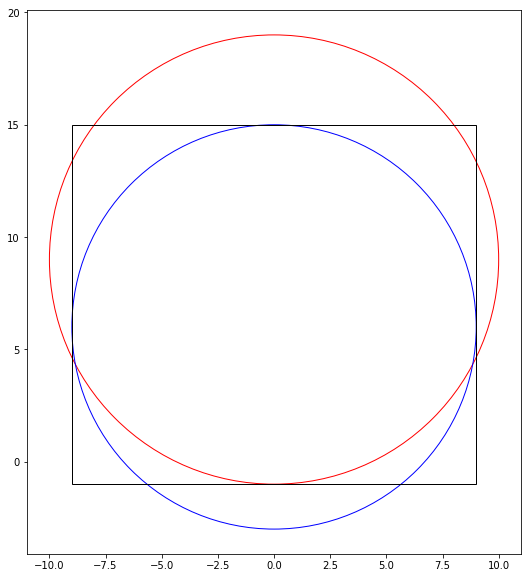

In [66]:
#D1 = (0,3,9) #Cuuando remueves sin importar que a mitad de polor estuviera involucrada
#D2 = (2,5,10)
#D1=(1,3,9) #Error elimina polos de mas
#D2=(1,5,10)

D1=(0,9,10)
D2=(0,6,9)

aabb = AABB(D1,D2)
Disc2D_intersect(D1,D2,aabb)



In [70]:
def Disc3D_intersect(C1,r1,C2,r2,rect) :
    offset=max([rect[i][1] for i in range(3)])+1
    fig0 = plt.figure(figsize=(20,20))
    ax0 = fig0.gca(projection='3d')
    ax0.set_aspect("equal")
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    
    u, v = np.mgrid[0:2*np.pi:120j, 0:np.pi:60j]
    
    #Esfera 1
    x1 =r1*np.cos(u)*np.sin(v)+C1[0]
    y1 = r1*np.sin(u)*np.sin(v)+C1[1]
    z1= r1*np.cos(v)+C1[2]
    
    dist = np.sqrt((x1-C2[0])**2+(y1-C2[1])**2+(z1-C2[2])**2)
    
    X1=x1[dist<=r2]
    m1 = len(X1)
    print(m1)
    X1=X1.reshape((1,m1))
    Y1=y1[dist<=r2].reshape(X1.shape)
    Z1=z1[dist<=r2].reshape(X1.shape)
    #X1=np.where(dist<=r2,x1,0)
    #Y1=np.where(dist<=r2,y1,0)
    #Z1=np.where(dist<=r2,z1,0)
    
    ax0.plot_wireframe(x1,y1,z1, color="r")
    ax.plot_wireframe(X1,Y1,Z1, color="r")
    
    
    #Esfera 2
    x2 =r2*np.cos(u)*np.sin(v)+C2[0]
    y2 = r2*np.sin(u)*np.sin(v)+C2[1]
    z2 = r2*np.cos(v)+C2[2]
    
    dist = np.sqrt((x2-C1[0])**2+(y2-C1[1])**2+(z2-C1[2])**2)
    
    X2=x2[dist<=r1]
    m2 = len(X2)
    print(m2)
    X2=X2.reshape((1,m2))
    Y2=y2[dist<=r1].reshape(X2.shape)
    Z2=z2[dist<=r1].reshape(X2.shape)
    #X2=np.where(dist<=r1,x2,0)
    #Y2=np.where(dist<=r1,y2,0)
    #Z2=np.where(dist<=r1,z2,0)
    
    ax0.plot_wireframe(x2,y2,z2, color="b")
    ax.plot_wireframe(X2,Y2,Z2, color="b")
    
    
    ax.set_xlim(-1*offset, offset)
    ax.set_ylim(-1*offset, offset)
    ax.set_zlim(-1*offset, offset)
    plt.show()
    
    
    #Graficando las proyecciones y rectangulos
    
    #XY
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(X1.reshape((m1,)),Y1.reshape((m1,)), color='r')
    ax.plot(X2.reshape((m2,)),Y2.reshape((m2,)),color='b')
    r1=plt.Rectangle(xy=(rect[0][0],rect[1][0]), width=rect[0][1]-rect[0][0], height=rect[1][1]-rect[1][0], linewidth=4.0,fill=False)
    ax.add_patch(r1)
    plt.axis('scaled')
    plt.show()
    
    #YZ
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(Y1.reshape((m1,)),Z1.reshape((m1,)), color='r')
    ax.plot(Y2.reshape((m2,)),Z2.reshape((m2,)),color='b')
    r2=plt.Rectangle(xy=(rect[1][0],rect[2][0]), width=rect[1][1]-rect[1][0], height=rect[2][1]-rect[2][0],linewidth=4.0, fill=False)
    ax.add_patch(r2)
    plt.axis('scaled')
    plt.show()
    
    #XZ
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(X1.reshape((m1,)),Z1.reshape((m1,)), color='r')
    ax.plot(X2.reshape((m2,)),Z2.reshape((m2,)),color='b')
    r3=plt.Rectangle(xy=(rect[0][0],rect[2][0]), width=rect[0][1]-rect[0][0], height=rect[2][1]-rect[2][0],linewidth=4.0, fill=False)
    ax.add_patch(r3)
    plt.axis('scaled')
    plt.show()
    

In [89]:
#D1 = (1,3,4,6)
#D2 = (2,3,2,6)

#D1=(0,0,0,1)
#D2=(2,0,0,2)

#D1=(1,2,3,4)  
#D2=(2,2,2,5) 

#D1 = (15,12,10,20)
#D2 = (30,24,20,4)

#D1=(2,4,5,2)
#D2=(1,5,2,3)

#D1=(1,3,1,9)
#D2=(-1,-1,2,5)

D1 = (8,3,5,6)
D2 = (8,4,0,7)


aabb = AABB(D1,D2)


>=2 puntos
intersecciones-->  [[13.863019699779286, 2.1369803002207126], [8.999163818798749, -2.499163818798749], [4.899832763759749, 2.6001672362402513]]
pntsD1-->  [[8], [3], [-1]]
pntsD2-->  [[8], [4], [7]]
[13.863019699779286, 2.1369803002207126, 8, 8]
[8.999163818798749, -2.499163818798749, 3, 4]
[4.899832763759749, 2.6001672362402513, -1, 7]
[[13.863019699779286, 2.1369803002207126, 8, 8], [8.999163818798749, -2.499163818798749, 3, 4], [4.899832763759749, 2.6001672362402513, -1, 7]]
RESULTADO
[[2.1369803002207126, 13.863019699779286], [-2.499163818798749, 8.999163818798749], [-1, 7]]


3112
2285


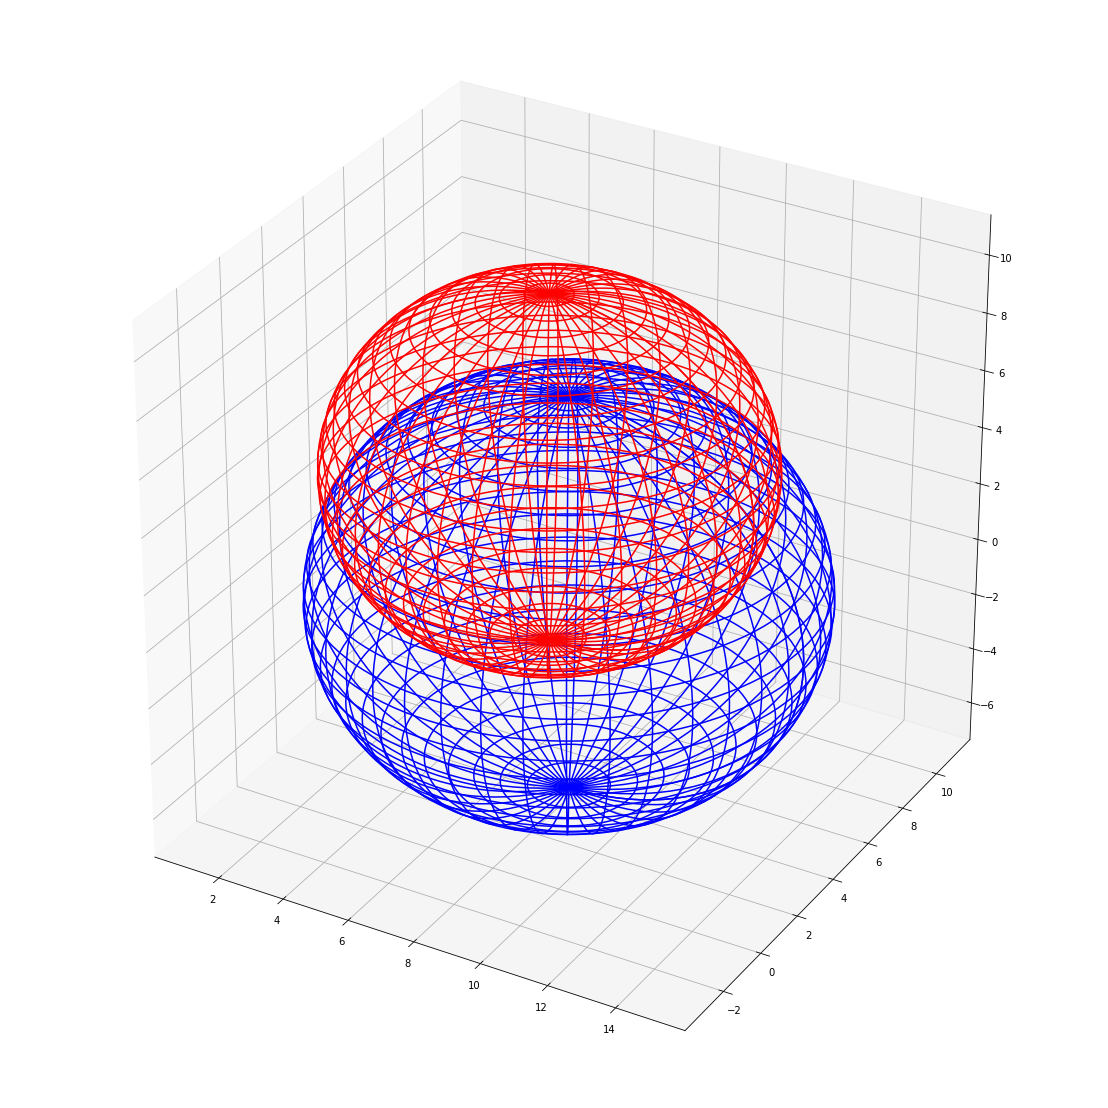

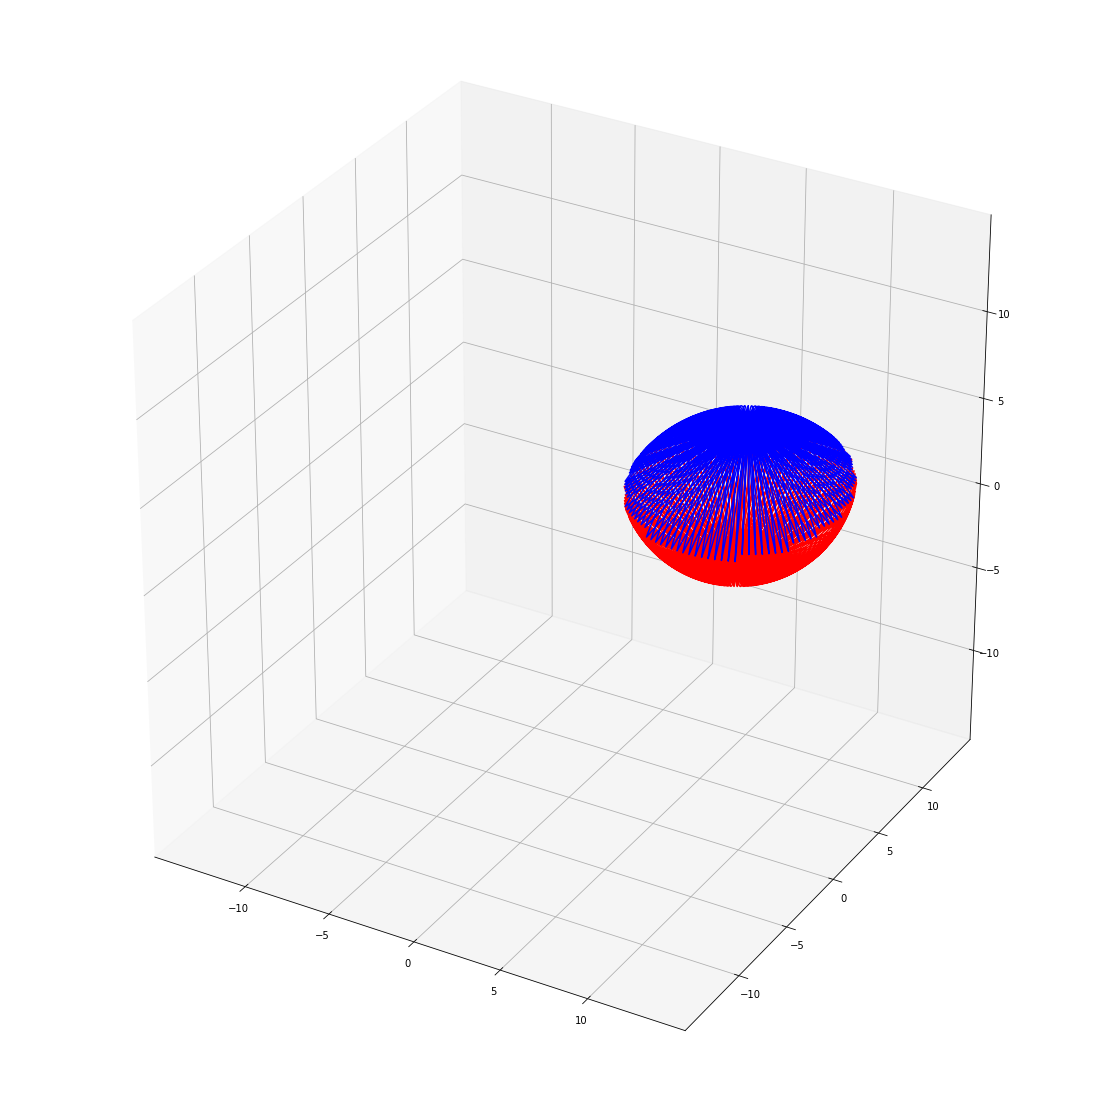

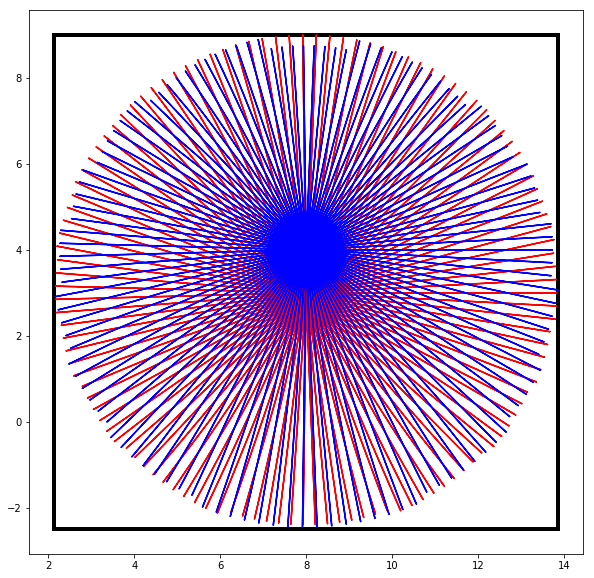

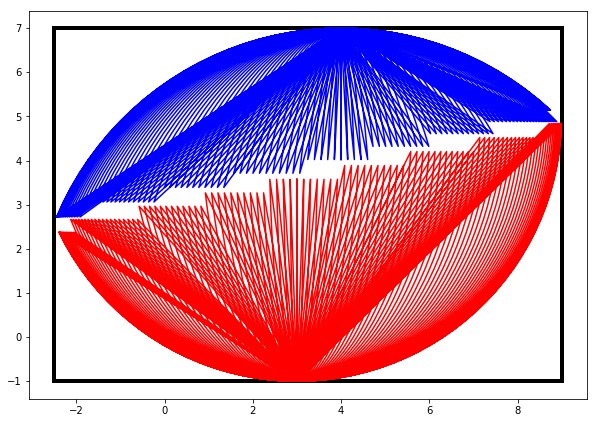

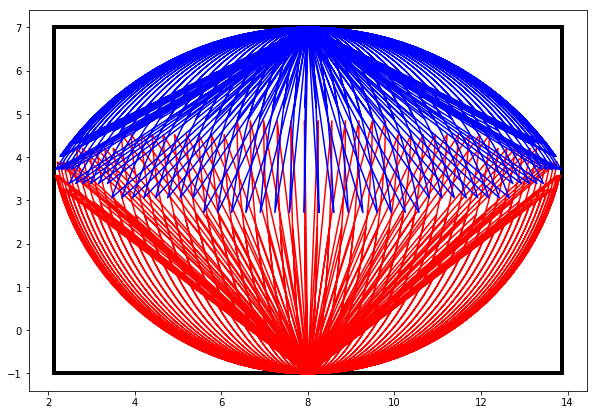

In [90]:
Disc3D_intersect(D1[:-1],D1[-1:],D2[:-1],D2[-1:], aabb)

In [81]:
def DiscND_intersect(C1,r1,C2,r2,rect) :

    u, v = np.mgrid[0:2*np.pi:120j, 0:np.pi:60j]
    
    #Esfera 1
    x1 =r1*np.cos(u)*np.sin(v)+C1[0]
    y1 = r1*np.sin(u)*np.sin(v)+C1[1]
    z1= r1*np.cos(v)+C1[2]
    
    dist = np.sqrt((x1-C2[0])**2+(y1-C2[1])**2+(z1-C2[2])**2)
    
    X1=x1[dist<=r2]
    m1 = len(X1)
    print(m1)
    X1=X1.reshape((1,m1))
    Y1=y1[dist<=r2].reshape(X1.shape)
    Z1=z1[dist<=r2].reshape(X1.shape)
    
    #Esfera 2
    x2 =r2*np.cos(u)*np.sin(v)+C2[0]
    y2 = r2*np.sin(u)*np.sin(v)+C2[1]
    z2 = r2*np.cos(v)+C2[2]
    
    dist = np.sqrt((x2-C1[0])**2+(y2-C1[1])**2+(z2-C1[2])**2)
    
    X2=x2[dist<=r1]
    m2 = len(X2)
    print(m2)
    X2=X2.reshape((1,m2))
    Y2=y2[dist<=r1].reshape(X2.shape)
    Z2=z2[dist<=r1].reshape(X2.shape)
        
    #Graficando las proyecciones y rectangulos
    
    #XY
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(X1.reshape((m1,)),Y1.reshape((m1,)), color='r')
    ax.plot(X2.reshape((m2,)),Y2.reshape((m2,)),color='b')
    r1=plt.Rectangle(xy=(rect[0][0],rect[1][0]), width=rect[0][1]-rect[0][0], height=rect[1][1]-rect[1][0], linewidth=4.0,fill=False)
    ax.add_patch(r1)
    plt.axis('scaled')
    plt.show()
    
    #YZ
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(Y1.reshape((m1,)),Z1.reshape((m1,)), color='r')
    ax.plot(Y2.reshape((m2,)),Z2.reshape((m2,)),color='b')
    r2=plt.Rectangle(xy=(rect[1][0],rect[2][0]), width=rect[1][1]-rect[1][0], height=rect[2][1]-rect[2][0],linewidth=4.0, fill=False)
    ax.add_patch(r2)
    plt.axis('scaled')
    plt.show()
    
    #XZ
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    ax.plot(X1.reshape((m1,)),Z1.reshape((m1,)), color='r')
    ax.plot(X2.reshape((m2,)),Z2.reshape((m2,)),color='b')
    r3=plt.Rectangle(xy=(rect[0][0],rect[2][0]), width=rect[0][1]-rect[0][0], height=rect[2][1]-rect[2][0],linewidth=4.0, fill=False)
    ax.add_patch(r3)
    plt.axis('scaled')
    plt.show()